In [178]:
# Import Modules
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit

from ReadFile import Read
from CenterOfMass2 import CenterOfMass
from GalaxyMass import ComponentMass
from RemnantDensityProfile import Integrator
from RemnantDensityProfile import density

In [179]:
# Get file info
filename = "Merger_801.txt"
Remnant_t, Remnant_p, Remnant_d = Read(filename)

Mhalo = np.sum(Remnant_d['m'])

In [ ]:
# Find virial radius
r_200 = M/deltarhocrit

radius where density is 169 times the 

In [ ]:
# Get density profile
# get COM of remnant
Remnant = CenterOfMass(filename, 1)

# Error tolerance
delta = 0.01
# Decrease volume factor
voldec = 2.0

# This is the center of mass of the remnant
Remnant_COMp = Remnant.COM_P(delta, voldec)

# Density Profile
'''
Use virial radius!!! 
'''
Halo_density = density(4000, 10)

In [214]:
print(Integrator(11500, 100)[1][-1])

411.9860349999991


In [215]:
print(Mhalo)
print(Integrator(4000, 10)[1][-1])

411.9860349999991
404.4275661699991


# Part 2: Fit halo density profiles to MW/M31 remnant

Three profiles: NFW, Einasto, Hernquist

Steps:

1) Import remnant density profile
2) Fit NFW Profile

    a) Determine $r_{dm}, \rho_{dm}$
3) Fit Hernquist Profile

    a) Determine $M_{halo}$, $a$
4) Fit Einasto Profile
    
    a) Determine $\rho_{-2}$, $\alpha$, $r_{-2}$

    Note: Use $\frac{dlog(\rho)}{dlog(r)} = -2$

5) Perform least squared test to determine which fit has the least error

In [181]:
def HernquistProfile(r, a):
    ''' 
    Hernquist profile format (see proposal)
    Inputs:
        r: variable
            Independent radius variable that density is dependent on
        a: paramater
            Scale length of remnant halo
    Outputs:
        func: function
            Hernquist profile function
    '''
    # Find halo mass
    Mhalo = Integrator(4000, 10)[1][-1]

    # Simplify
    numerator = Mhalo*a
    denom = 2*np.pi*r*(r+a)**3

    func = numerator/denom
    
    return np.float64(func)

In [193]:
# Letting Mass be a parameter for Hernquist
def HernquistwM(r, Mhalo, a):
    ''' 
    Hernquist profile format (see proposal)
    Inputs:
        r: variable
            Independent radius variable that density is dependent on
        a: paramater
            Scale length of remnant halo
    Outputs:
        func: function
            Hernquist profile function
    '''
    # Simplify
    numerator = Mhalo*a
    denom = 2*np.pi*r*(r+a)**3

    func = numerator/denom
    
    return np.float64(func)


In [182]:
def NFWProfile(r, rdm, rhodm):
    ''' 
    NFW profile format (see proposal)
    Inputs:
        r: variable
            Independent radius variable that density is dependent on
        rdm: variable
            Charactoristic radius
        rhodm: variable
            Characteristic density
    Outputs:
        func: function
            NFW profile function
    '''
    ######
    #    Do we need to simplify for rdm and rhodm? 
    ######

    # Simplify
    A = (r/rdm)**(-1)
    B = (1+(r/rdm))**(-2)

    func = rhodm * A * B
    
    return func

In [187]:
# Fitting to our density profiles
# Hernquist
Hernpopt, Hernpcov = curve_fit(HernquistProfile, Halo_density[0], Halo_density[1], p0=(30))
Hern_fit = HernquistProfile(Halo_density[0], *Hernpopt)


In [199]:
# Hernquist with mass as a parameter
HernMpopt, HernMpcov = curve_fit(HernquistwM, Halo_density[0], Halo_density[1])
HernM_fit = HernquistwM(Halo_density[0], *HernMpopt)
HernMerr = np.sqrt(np.diag(HernMpcov))
print(HernMerr)

[74.8467164   1.58775638]


In [190]:
# NFW 
NFWpopt, NFWpcov = curve_fit(NFWProfile, Halo_density[0], Halo_density[1], p0=(400, 1))
NFW_fit = NFWProfile(Halo_density[0], *NFWpopt)
print(NFWpopt)
NFWerr= np.sqrt(np.diag(NFWpcov))
print(NFWerr)

[5.10924219e+01 9.14949321e-04]
[1.11345601e+00 2.00175373e-05]


In [184]:
print(Hernpopt)
Hernerr= np.sqrt(np.diag(Hernpcov))
print("a Error:", Hernerr[0])
#print("a Error:", Hernerr[1])

[37.02920956]
a Error: 0.002828606868265233


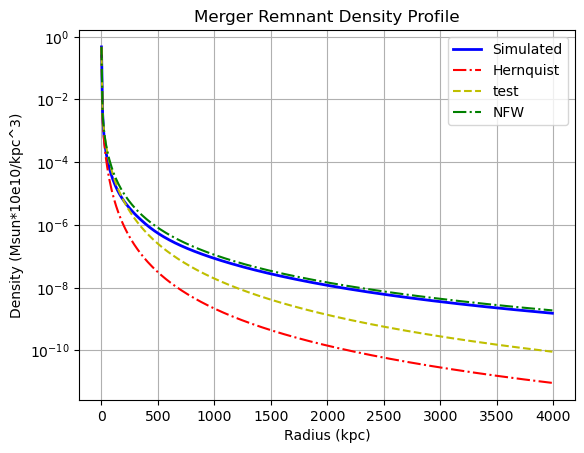

In [197]:
# Plotting
fig, ax = plt.subplots()
# Simulated Density profile
ax.plot(Halo_density[0], Halo_density[1], 'b', linewidth = 2, label='Simulated')

# Henrquist fit
ax.plot(Halo_density[0], Hern_fit, color = 'r', label='Hernquist', linestyle='-.')

# Hern with mass
ax.plot(Halo_density[0], HernM_fit, color = 'y', label='test', linestyle='--')

# NFW fit
ax.plot(Halo_density[0], NFW_fit, color = 'g', label='NFW', linestyle='-.')


# Formatting
ax.set_yscale('log')
ax.grid()
ax.set(title='Merger Remnant Density Profile', xlabel='Radius (kpc)', ylabel='Density (Msun*10e10/kpc^3)')
ax.legend(loc='best')

plt.show()